<a href="https://colab.research.google.com/github/marcus-santos/ifsp-carcdsi-playground/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

caminho = '/content/drive/MyDrive/IFSP/Semestre_6/CARCDSI/MaterialApoio/'

Mounted at /content/drive


In [ ]:
with open(caminho + 'risco_credito.pkl', 'rb') as f:
  x_credit, y_credit = pickle.load(f)

In [ ]:
x_credit = np.delete(x_credit, [2,7], axis=0)
y_credit = np.delete(y_credit, [2,7], axis=0)

In [ ]:
logistic = LogisticRegression(random_state=1)
logistic.fit(x_credit, y_credit)

LogisticRegression(random_state=1)

In [ ]:
# Historia boa, divida alta, garantias nenhuma, renda > 35
# Gistoria ruim, divida alta, garantias adequada, renda < 15

previsoes = logistic.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes

array(['baixo', 'alto'], dtype=object)

In [ ]:
with open(caminho + 'credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
logistic_teste = LogisticRegression(random_state=1)
logistic_teste.fit(x_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [ ]:
accuracy_score(y_credit_teste, logistic_teste.predict(x_credit_teste))

0.944

0.944

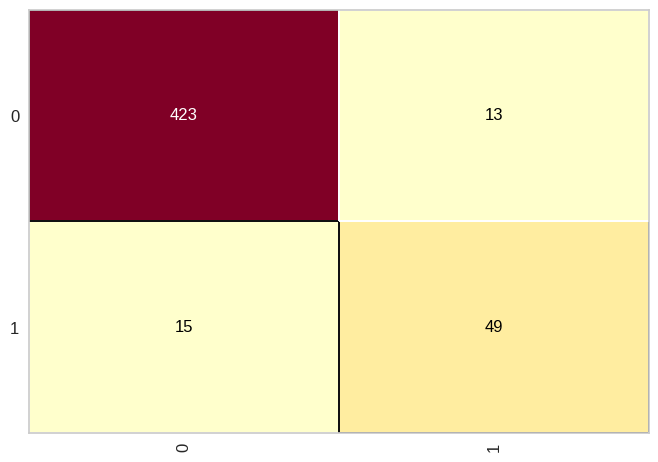

In [ ]:
cm = ConfusionMatrix(logistic_teste)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)